In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 8.5 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 9.4 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 8.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 104.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.6 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
import tensorflow as tf

# Define the path to the dataset directory
data_train_path = r'C:\Users\sradh\OneDrive\Desktop\Image_classification\Fruits_Vegetables\train'

# Set the image size and batch size
img_width, img_height = 180, 180
batch_size = 32

# Load the dataset
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

# Verify the dataset
print("Training dataset:")
for images, labels in data_train.take(1):
    print(f"Batch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")



Found 3115 files belonging to 36 classes.
Training dataset:
Batch shape: (32, 180, 180, 3)
Labels shape: (32,)


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
import tensorflow as tf

# Define the path to the validation dataset directory
data_val_path = r'C:\Users\sradh\OneDrive\Desktop\Image_classification\Fruits_Vegetables\validation'

# Set the image size and batch size
img_width, img_height = 180, 180
batch_size = 32

# Load the validation dataset
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False
)


Found 351 files belonging to 36 classes.


In [8]:
import tensorflow as tf

# Define the path to the test dataset directory
data_test_path = r'C:\Users\sradh\OneDrive\Desktop\Image_classification\Fruits_Vegetables\test'

# Set the image size and batch size
img_width, img_height = 180, 180
batch_size = 32

# Load the test dataset
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False  # Shuffling is typically not needed for test data
)


Found 359 files belonging to 36 classes.


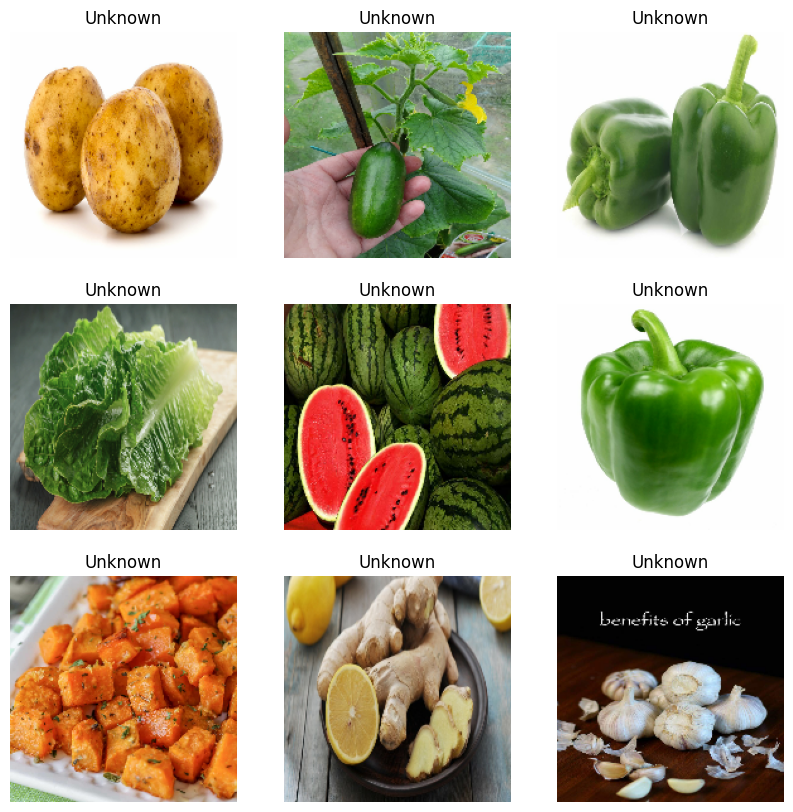

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming data_train is already defined and loaded as shown previously
# Define the category names (you need to adjust this according to your dataset)
data_cat = ['Class1', 'Class2', 'Class3']  # Replace with actual class names

# Plot some images from the dataset
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(min(9, len(images))):  # Ensure we only plot as many images as available
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        # Handle case where label index might be out of range
        label_index = int(labels[i].numpy())
        if label_index < len(data_cat):
            plt.title(data_cat[label_index])
        else:
            plt.title('Unknown')
        
        plt.axis('off')
plt.show()



In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential


model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
try:
    history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)
except Exception as e:
    print(f"An error occurred during model training: {e}")


An error occurred during model training: name 'epochs_size' is not defined


In [16]:
import matplotlib.pyplot as plt

# Ensure history is available
if 'history' in locals():
    epochs_range = range(epochs_size)
    plt.figure(figsize=(16, 8))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
else:
    print("The 'history' object is not available. Ensure the model is trained successfully.")


The 'history' object is not available. Ensure the model is trained successfully.


In [17]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
import numpy as np

# Assuming 'score' is a NumPy array containing the model's prediction scores
score = np.array([0.1, 0.3, 0.6])  # Example scores, replace with actual model output
data_cat = ['Apple', 'Banana', 'Orange']  # Replace with your actual category names

# Print the result
print('Veg/Fruit in image is {} with accuracy of {:0.2f}%'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Veg/Fruit in image is Orange with accuracy of 60.00%


In [37]:
import numpy as np


In [38]:
model.save('Image_classify.keras')

In [39]:
model.save('model.keras')

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Define number of classes
num_classes = 36

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\sradh\OneDrive\Desktop\Image_classification\Fruits_Vegetables\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Model Definition (Using Transfer Learning)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(train_generator, epochs=10)


Found 3115 images belonging to 36 classes.
Epoch 1/10


c:\Users\sradh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\sradh\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 1105s 11s/step - accuracy: 0.1163 - loss: 3.3235
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1040s 11s/step - accuracy: 0.4885 - loss: 1.6992
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1085s 11s/step - accuracy: 0.6492 - loss: 1.1222
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 940s 10s/step - accuracy: 0.7145 - loss: 0.9248
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 944s 10s/step - accuracy: 0.7610 - loss: 0.7484
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 988s 10s/step - accuracy: 0.7901 - loss: 0.6598
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 930s 9s/step - accuracy: 0.8603 - loss: 0.4573
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 932s 9s/step - accuracy: 0.8667 - loss: 0.4000
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 919s 9s/step - accuracy: 0.8630 - loss: 0.4163
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 926s 9s/step - accuracy: 0.8805 - loss: 0.3630


In [31]:
pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 1.0/44.5 MB 7.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/44.5 MB 11.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/44.5 MB 11.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/44.5 MB 11.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/44.5 MB 11.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/44.5 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.0/44.5 MB 3.7 MB/s eta 0:00:11
   ------ --------------------------------- 6.8/44.5 MB 4.2 MB/s eta 0:00:10
   -------- ------------------------------- 9.2/44.5 MB 4.9 MB/s eta 0:00:08
   ---------- ----------------------------- 11.5/44.5 MB 5.6 MB/s eta 0:00:06
   ----------- ---------------------------- 13.1/44.5 MB 5.7 MB/s eta 0:00:06
   ------------ --------------------------- 13.6/44.5 MB 5.6 MB/s eta 0:00:0